In [1]:
import os
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from scipy.stats import linregress

import matplotlib.pyplot as plt
import fnmatch
plt.style.use('default')

In [2]:
home=os.getcwd()
home
data_path='/Users/ivanyankov/Documents/Chapter_DNA_Modelling/data/processed/'

In [3]:

def find_file_recursively(directory, filename_pattern):
    matches = []
    for root, dirnames, filenames in os.walk(directory):
        for filename in fnmatch.filter(filenames, filename_pattern):
            matches.append(os.path.join(root, filename))
    return matches

# Example usage:
directory_to_search = '/Users/ivanyankov/Documents/Chapter_DNA_Modelling/'
file_to_find = 'LZ_IY.csv'

found_files = find_file_recursively(directory_to_search, file_to_find)

for file in found_files:
    print(file)

In [4]:
df=pd.read_csv(data_path+'Lz_IY.csv')
len(df.columns[3:23])
df.columns[3:23]


Index(['dH', 'dS', 'dG', 'Tm', 'NN_dH', 'NN_dS', 'NN_dG', 'NN_Tm', 'MMPBSA_dH',
       'MMPBSA_dS', 'MMPBSA_dG', 'MMPBSA_Tm', 'MMGBSA_dH', 'MMGBSA_dS',
       'MMGBSA_dG', 'MMGBSA_Tm', 'IMPL_dH', 'IMPL_dS', 'IMPL_dG', 'IMPL_Tm'],
      dtype='object')

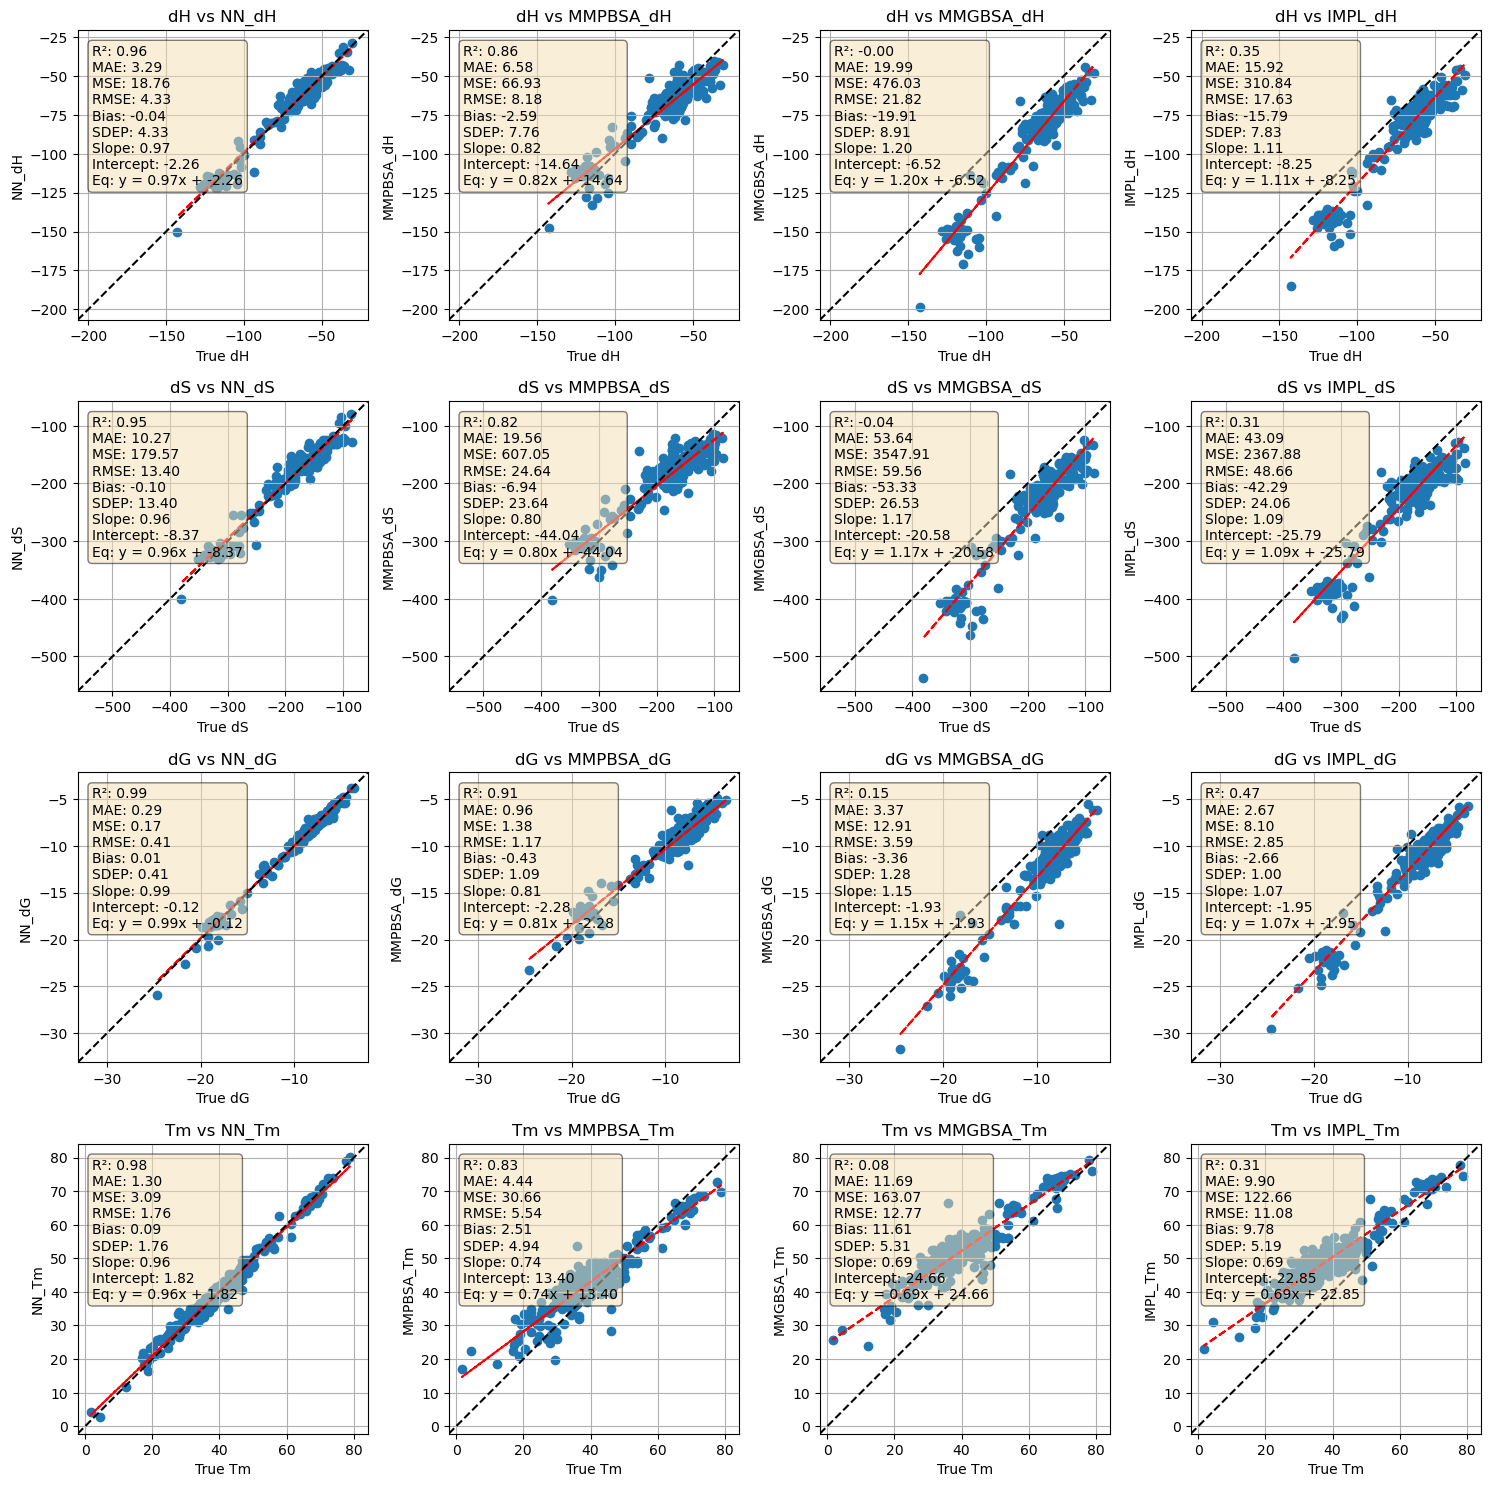

In [5]:
# Define the true values and the corresponding predicted columns
properties = ['dH', 'dS', 'dG', 'Tm']
methods = ['NN_', 'MMPBSA_', 'MMGBSA_', 'IMPL_']

# Determine the min and max limits for each property, with a buffer
buffer_factor = 0.05  # 5% buffer

limits = {}
for prop in properties:
    min_limit = min(df[prop].min(), df[f'NN_{prop}'].min(), df[f'MMPBSA_{prop}'].min(), df[f'MMGBSA_{prop}'].min(), df[f'IMPL_{prop}'].min())
    max_limit = max(df[prop].max(), df[f'NN_{prop}'].max(), df[f'MMPBSA_{prop}'].max(), df[f'MMGBSA_{prop}'].max(), df[f'IMPL_{prop}'].max())
    
    # Add buffer to the limits
    range_limit = max_limit - min_limit
    min_limit -= buffer_factor * range_limit
    max_limit += buffer_factor * range_limit
    
    limits[prop] = (min_limit, max_limit)
# Create a figure and axes for the 4x4 grid
# fig, axes = plt.subplots(4, 4, figsize=(8.27, 11.69))  # A4 size in inches

# Create a figure and axes for the 4x4 grid
fig, axes = plt.subplots(4, 4, figsize=(15, 15))  # A4 size in inches


for i, prop in enumerate(properties):
    for j, method in enumerate(methods):
        ax = axes[i, j]
        true_values = df[prop]
        predicted_values = df[method + prop]

        # Scatter plot
        ax.scatter(true_values, predicted_values)

        # Fit the line of best fit
        slope, intercept, r_value, p_value, std_err = linregress(true_values, predicted_values)
        ax.plot(true_values, slope * true_values + intercept, color='red', linestyle='--')

        # Set the same X and Y limits for the same property
        ax.set_xlim(limits[prop])
        ax.set_ylim(limits[prop])

        # Set square aspect ratio
        ax.set_aspect('equal', 'box')

        # Plot the diagonal line y = x
        ax.plot(limits[prop], limits[prop], color='black', linestyle='--')

        ax.set_xlabel(f'True {prop}')
        ax.set_ylabel(f'{method}{prop}')
        ax.set_title(f'{prop} vs {method}{prop}')
        ax.grid(True)

        # Calculate metrics
        r2 = r2_score(true_values, predicted_values)
        mae = mean_absolute_error(true_values, predicted_values)
        mse = mean_squared_error(true_values, predicted_values)
        rmse = np.sqrt(mse)
        bias = np.mean(predicted_values - true_values)
        sdep = np.sqrt(np.mean((predicted_values - true_values - bias) ** 2))

        # Add text box with metrics
        textstr = (f'R²: {r2:.2f}\n'
                   f'MAE: {mae:.2f}\n'
                   f'MSE: {mse:.2f}\n'
                   f'RMSE: {rmse:.2f}\n'
                   f'Bias: {bias:.2f}\n'
                   f'SDEP: {sdep:.2f}\n'
                   f'Slope: {slope:.2f}\n'
                   f'Intercept: {intercept:.2f}\n'
                   f'Eq: y = {slope:.2f}x + {intercept:.2f}')
        props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
        ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=10,
                verticalalignment='top', bbox=props)

# Adjust layout to avoid overlapping
plt.tight_layout()

# Display the plot
plt.show()

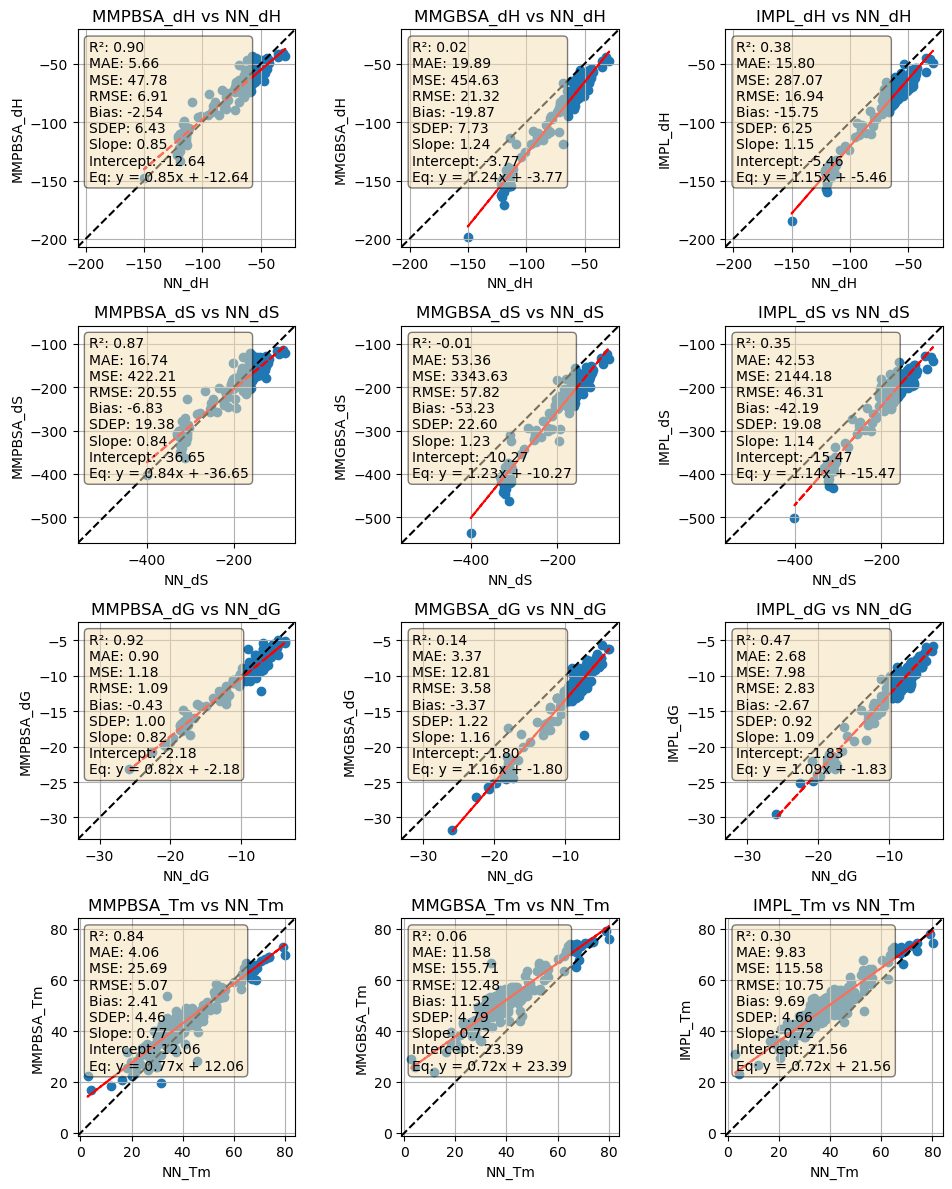

In [6]:

# Define the true values and the corresponding predicted columns
properties = ['dH', 'dS', 'dG', 'Tm']
methods = ['MMPBSA_', 'MMGBSA_', 'IMPL_']  # Comparing against NN_

# Determine the min and max limits for each property, with a buffer
buffer_factor = 0.05  # 5% buffer

limits = {}
for prop in properties:
    nn_values = df[f'NN_{prop}']
    min_limit = min(nn_values.min(), df[f'MMPBSA_{prop}'].min(), df[f'MMGBSA_{prop}'].min(), df[f'IMPL_{prop}'].min())
    max_limit = max(nn_values.max(), df[f'MMPBSA_{prop}'].max(), df[f'MMGBSA_{prop}'].max(), df[f'IMPL_{prop}'].max())
    
    # Add buffer to the limits
    range_limit = max_limit - min_limit
    min_limit -= buffer_factor * range_limit
    max_limit += buffer_factor * range_limit
    
    limits[prop] = (min_limit, max_limit)

# Create a figure and axes for the 4x3 grid
fig, axes = plt.subplots(4, 3, figsize=(10, 12))  # Adjust the size for square plots

for i, prop in enumerate(properties):
    nn_values = df[f'NN_{prop}']
    for j, method in enumerate(methods):
        ax = axes[i, j]
        predicted_values = df[method + prop]

        # Scatter plot
        ax.scatter(nn_values, predicted_values)

        # Fit the line of best fit
        slope, intercept, r_value, p_value, std_err = linregress(nn_values, predicted_values)
        ax.plot(nn_values, slope * nn_values + intercept, color='red', linestyle='--')

        # Set the same X and Y limits for the same property with buffer
        ax.set_xlim(limits[prop])
        ax.set_ylim(limits[prop])

        # Set square aspect ratio
        ax.set_aspect('equal', 'box')

        # Plot the diagonal line y = x
        ax.plot(limits[prop], limits[prop], color='black', linestyle='--')

        ax.set_xlabel(f'NN_{prop}')
        ax.set_ylabel(f'{method}{prop}')
        ax.set_title(f'{method}{prop} vs NN_{prop}')
        ax.grid(True)

        # Calculate metrics
        r2 = r2_score(nn_values, predicted_values)
        mae = mean_absolute_error(nn_values, predicted_values)
        mse = mean_squared_error(nn_values, predicted_values)
        rmse = np.sqrt(mse)
        bias = np.mean(predicted_values - nn_values)
        sdep = np.sqrt(np.mean((predicted_values - nn_values - bias) ** 2))

        # Add text box with metrics, slope, and linear equation
        textstr = (f'R²: {r2:.2f}\n'
                   f'MAE: {mae:.2f}\n'
                   f'MSE: {mse:.2f}\n'
                   f'RMSE: {rmse:.2f}\n'
                   f'Bias: {bias:.2f}\n'
                   f'SDEP: {sdep:.2f}\n'
                   f'Slope: {slope:.2f}\n'
                   f'Intercept: {intercept:.2f}\n'
                   f'Eq: y = {slope:.2f}x + {intercept:.2f}')
        props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
        ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=10,
                verticalalignment='top', bbox=props)

# Adjust layout to avoid overlapping
plt.tight_layout()

# Display the plot
plt.show()

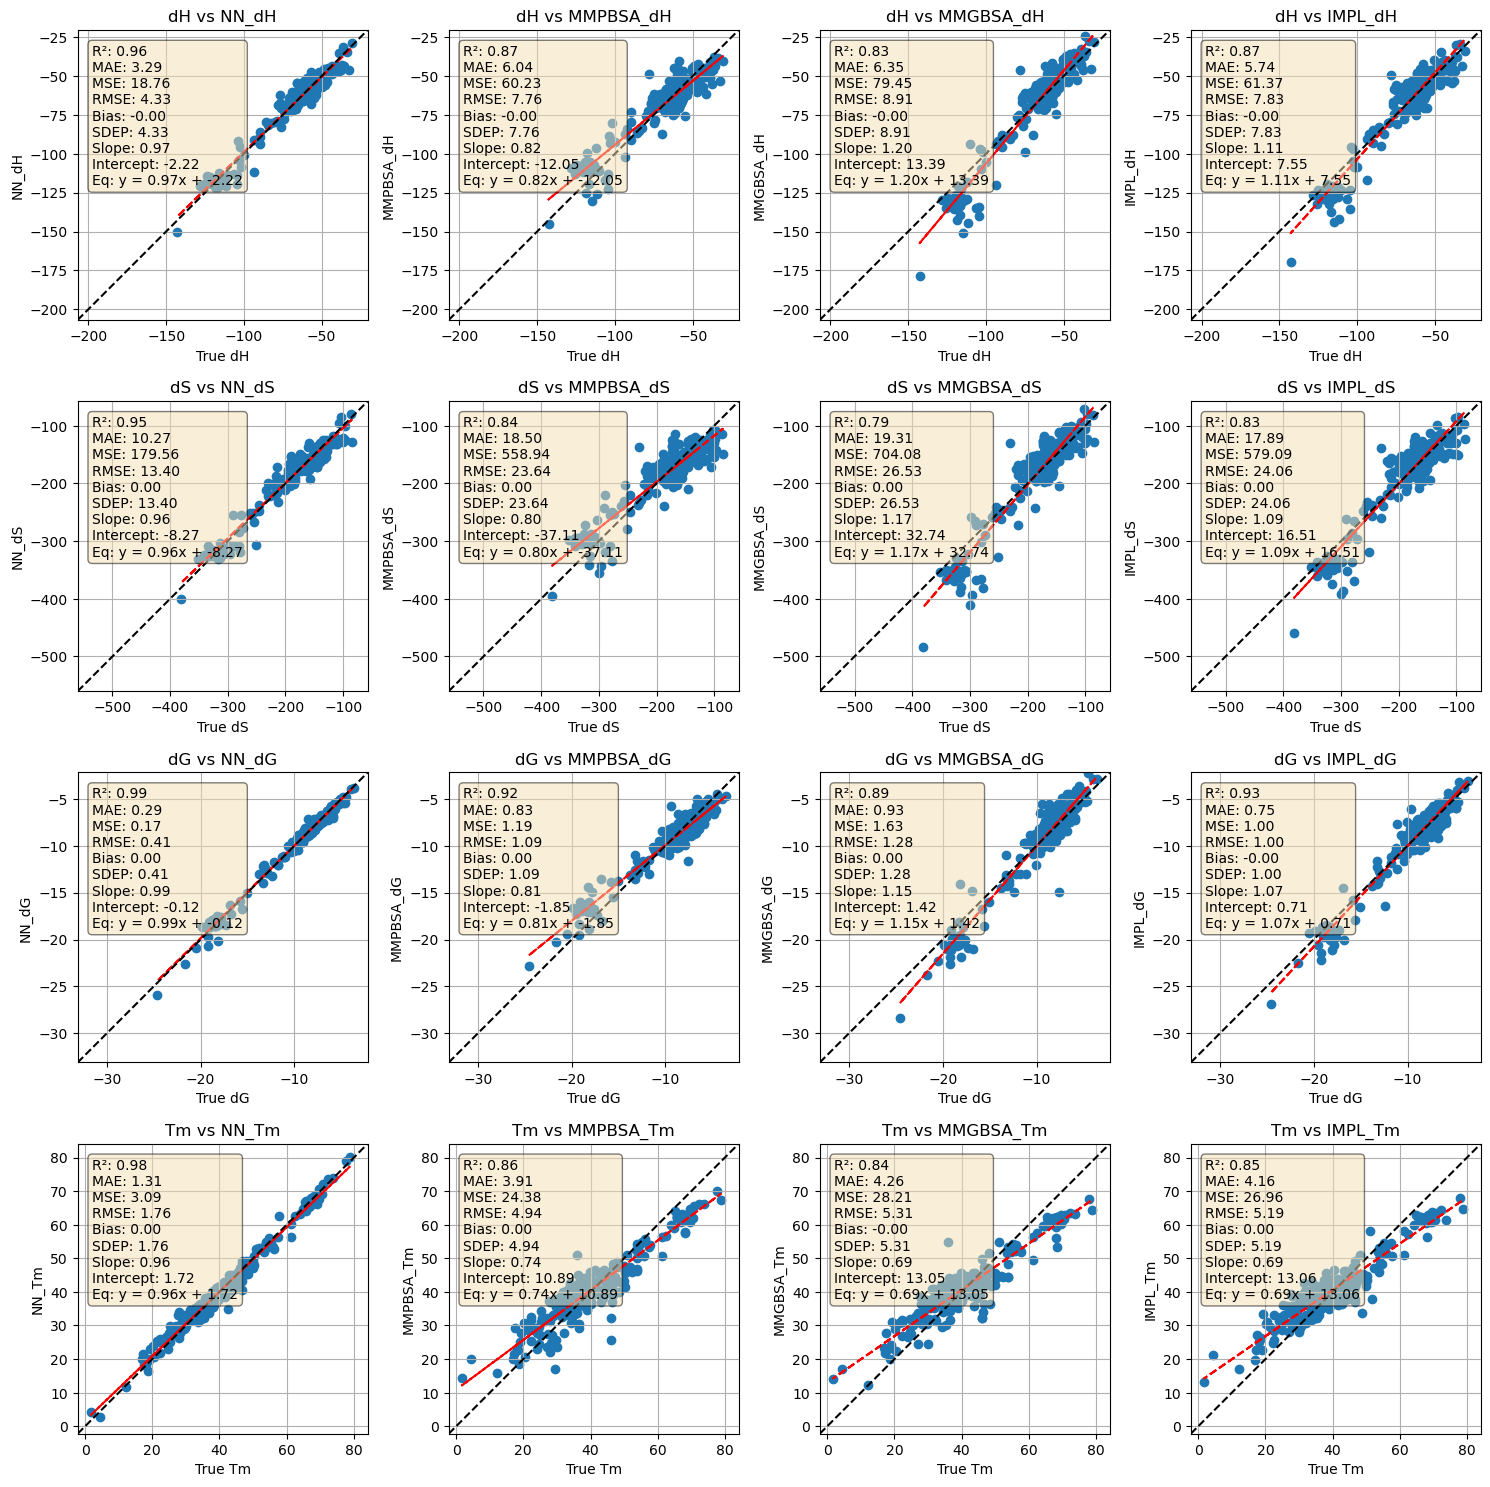

In [7]:
# Define the true values and the corresponding predicted columns
properties = ['dH', 'dS', 'dG', 'Tm']
methods = ['NN_', 'MMPBSA_', 'MMGBSA_', 'IMPL_']

# Determine the min and max limits for each property, with a buffer
buffer_factor = 0.05  # 5% buffer

limits = {}
for prop in properties:
    min_limit = min(df[prop].min(), df[f'NN_{prop}'].min(), df[f'MMPBSA_{prop}'].min(), df[f'MMGBSA_{prop}'].min(), df[f'IMPL_{prop}'].min())
    max_limit = max(df[prop].max(), df[f'NN_{prop}'].max(), df[f'MMPBSA_{prop}'].max(), df[f'MMGBSA_{prop}'].max(), df[f'IMPL_{prop}'].max())
    
    # Add buffer to the limits
    range_limit = max_limit - min_limit
    min_limit -= buffer_factor * range_limit
    max_limit += buffer_factor * range_limit
    
    limits[prop] = (min_limit, max_limit)
# Create a figure and axes for the 4x4 grid
# fig, axes = plt.subplots(4, 4, figsize=(8.27, 11.69))  # A4 size in inches

# Create a figure and axes for the 4x4 grid
fig, axes = plt.subplots(4, 4, figsize=(15, 15))  # A4 size in inches


for i, prop in enumerate(properties):
    for j, method in enumerate(methods):
        ax = axes[i, j]
        true_values = df[prop]
        predicted_values = df[method + prop]
        bias = np.mean(predicted_values - true_values)
        predicted_values = df[method + prop]-bias

        # Scatter plot
        ax.scatter(true_values, predicted_values)

        # Fit the line of best fit
        slope, intercept, r_value, p_value, std_err = linregress(true_values, predicted_values)
        ax.plot(true_values, slope * true_values + intercept, color='red', linestyle='--')

        # Set the same X and Y limits for the same property
        ax.set_xlim(limits[prop])
        ax.set_ylim(limits[prop])

        # Set square aspect ratio
        ax.set_aspect('equal', 'box')

        # Plot the diagonal line y = x
        ax.plot(limits[prop], limits[prop], color='black', linestyle='--')

        ax.set_xlabel(f'True {prop}')
        ax.set_ylabel(f'{method}{prop}')
        ax.set_title(f'{prop} vs {method}{prop}')
        ax.grid(True)

        # Calculate metrics
        
        r2 = r2_score(true_values, predicted_values)
        mae = mean_absolute_error(true_values, predicted_values)
        mse = mean_squared_error(true_values, predicted_values)
        rmse = np.sqrt(mse)
        bias = np.mean(predicted_values - true_values)
        sdep = np.sqrt(np.mean((predicted_values - true_values - bias) ** 2))

        # Add text box with metrics
        textstr = (f'R²: {r2:.2f}\n'
                   f'MAE: {mae:.2f}\n'
                   f'MSE: {mse:.2f}\n'
                   f'RMSE: {rmse:.2f}\n'
                   f'Bias: {bias:.2f}\n'
                   f'SDEP: {sdep:.2f}\n'
                   f'Slope: {slope:.2f}\n'
                   f'Intercept: {intercept:.2f}\n'
                   f'Eq: y = {slope:.2f}x + {intercept:.2f}')
        props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
        ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=10,
                verticalalignment='top', bbox=props)

# Adjust layout to avoid overlapping
plt.tight_layout()

# Display the plot
plt.show()

In [8]:
len(df.columns)
rf_score_columns = df.filter(like='RF-Score').columns

In [9]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

rf_score_columns = df.filter(like='RF-Score').columns

# Assuming 'target' is the name of your target column and the rest are features
X = df[rf_score_columns]  # Features
y = df['Tm']  # Target

# Perform the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# X_train
# X_train=df[rf_score_columns]
# y_train=df['dG']



/Users/ivanyankov/opt/anaconda3/envs/linear/lib/python3.9/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
/Users/ivanyankov/opt/anaconda3/envs/linear/lib/python3.9/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


<ErrorbarContainer object of 3 artists>

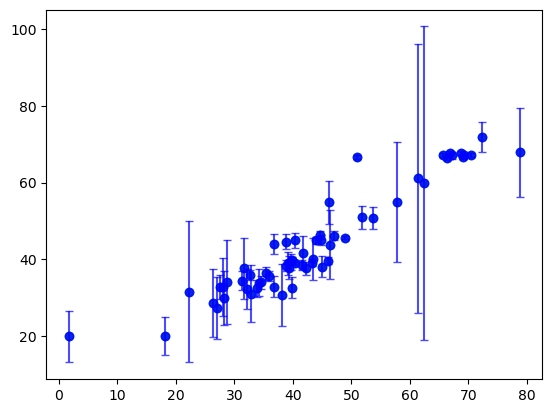

In [10]:

# Initial model training
model = RandomForestRegressor(n_estimators=100,max_depth=6,max_features=20)
model.fit(X_train.to_numpy(), y_train)
# sum(model.predict(X_train)-y_train)

# Generate predictions from each tree in the Random Forest for the pool of unlabeled data (X_pool)
predictions = np.array([tree.predict(X_test.to_numpy()) for tree in model.estimators_])

# Calculate the variance of these predictions across all trees
# This variance indicates the uncertainty for each data point in X_pool
prediction_variances = np.var(predictions, axis=0)

plt.scatter(y_test, model.predict(X_test))
plt.errorbar(y_test,model.predict(X_test),yerr=prediction_variances/2, fmt='o', color='blue', alpha=0.7, capsize=3, label='Predictions with Uncertainty')

In [11]:

# for iteration in range(max_iterations):
    # Step 1: Predict using the Random Forest and calculate uncertainties
    
# Generate predictions from each tree in the Random Forest for the pool of unlabeled data (X_pool)
predictions = np.array([tree.predict(X_test.to_numpy()) for tree in model.estimators_])

# Calculate the variance of these predictions across all trees
# This variance indicates the uncertainty for each data point in X_pool
prediction_variances = np.var(predictions, axis=0)

# # Step 2: Identify the most uncertain points
n_uncertain_points=10
# # Sort the variances in descending order and select the indices of the top n_uncertain_points
# # These are the data points where the model is most uncertain
uncertain_indices = np.argsort(prediction_variances)[-n_uncertain_points:]

# # Extract the actual data points (uncertain_data) from X_pool that correspond to these indices
uncertain_data = X_test.index[uncertain_indices]

# # (Optional) The corresponding variance values can be extracted as well for analysis or logging
uncertain_variances = prediction_variances[uncertain_indices]


# # At this point, uncertain_data contains the data points from X_pool where the Random Forest model
# has the highest uncertainty in its predictions.

/Users/ivanyankov/opt/anaconda3/envs/linear/lib/python3.9/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


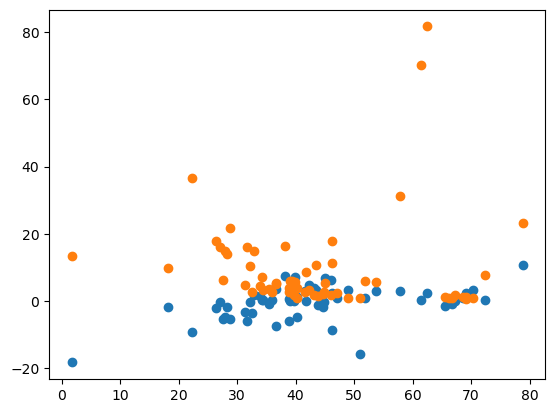

In [37]:
y_pred=model.predict(X_test)
err=(y_test-y_pred)
err
plt.scatter(y_test, err)
plt.scatter(y_test, prediction_variances)


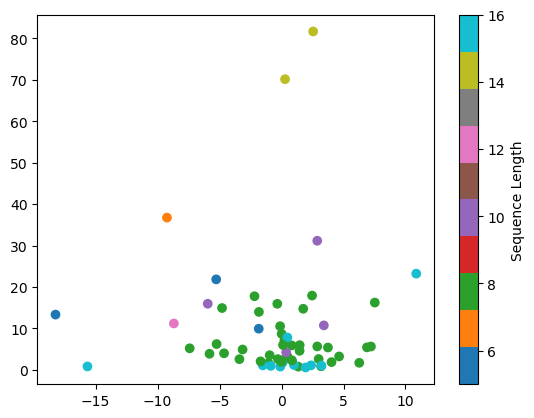

In [54]:
# scatter = plt.scatter(np.abs(err), prediction_variances, c=sequence_length, cmap='tab10',)
scatter = plt.scatter((err), prediction_variances, c=sequence_length, cmap='tab10',)
# mean_absolute_error(y_test,y_pred)
plt.colorbar(scatter, label='Sequence Length')


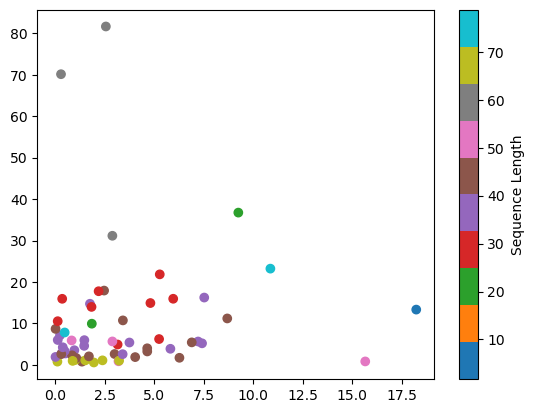

In [56]:
scatter = plt.scatter(np.abs(err), prediction_variances, c=y_test, cmap='tab10',)
# scatter = plt.scatter((err), prediction_variances, c=y_test, cmap='tab10',)
# mean_absolute_error(y_test,y_pred)
plt.colorbar(scatter, label='Sequence Length')


In [47]:
sequence_length = df.loc[X_test.index, 'CountDNA_pos_Tot'].values
sequence_length

array([ 8, 16, 16,  7, 10,  8, 10,  8,  8,  8,  8, 16,  8,  8,  6, 12,  8,
        8,  8,  8,  8,  6,  8,  8,  8,  8,  8, 16,  8, 15,  8,  8,  8,  8,
        8,  8, 10,  8, 16, 10,  8,  5,  8,  8,  8,  8,  8, 16,  8, 14,  8,
        8, 10, 16, 16,  8, 16, 14, 16,  8,  8])

In [12]:
uncertain_indices
X_test.index
uncertain_data
uncertain_variances

array([15.96304595, 16.25446283, 17.78043063, 17.93881221, 21.85054854,
       23.23038981, 31.15895288, 36.74580803, 70.13408116, 81.64528691])

In [13]:
df.loc[y_test.index]

,ID,Branch,DNA,dH,dS,dG,Tm,NN_dH,NN_dS,NN_dG,...,CountDNA_pos_A,CountDNA_pos_G,CountDNA_pos_C,CountDNA_pos_T,CountDNA_pos_Tot,CountDNAp_pos_A,CountDNAp_pos_G,CountDNAp_pos_C,CountDNAp_pos_T,CountDNAp_pos_Tot
180,181,2B,gcatggac,-64.3,-179.5,-8.8,40.3,-61.8,-171.7,-8.6,...,2,3,2,1,8,0.250000,0.375000,0.250000,0.125000,8
154,155,5AA,gacttgtggacggtat,-120.2,-326.0,-19.0,68.7,-119.5,-325.7,-18.5,...,3,6,2,5,16,0.187500,0.375000,0.125000,0.312500,16
111,112,7CC,cgctatgaaccacttg,-116.3,-317.0,-18.0,66.3,-118.3,-322.4,-18.3,...,4,3,5,4,16,0.250000,0.187500,0.312500,0.250000,16
247,248,4D,ggactta,-50.7,-146.0,-5.4,22.3,-47.7,-136.1,-5.5,...,2,2,1,2,7,0.285714,0.285714,0.142857,0.285714,7
60,61,8DD,caaagaaaag,-70.1,-199.0,-8.4,38.9,-70.1,-199.5,-8.2,...,7,2,1,0,10,0.700000,0.200000,0.100000,0.000000,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218,219,4D,gcggtaaggatctagt,-121.5,-333.0,-18.3,65.6,-114.7,-311.7,-18.0,...,4,6,2,4,16,0.250000,0.375000,0.125000,0.250000,16
104,105,7CC,cgatgttccagtca,-102.9,-281.0,-15.8,62.4,-104.1,-284.2,-15.9,...,3,3,4,4,14,0.214286,0.214286,0.285714,0.285714,14
302,303,5AA,ttgaagatacgctggc,-119.0,-322.0,-19.0,69.2,-118.7,-322.2,-18.7,...,4,5,3,4,16,0.250000,0.312500,0.187500,0.250000,16
194,195,3C,gccgcgac,-62.3,-165.0,-11.0,53.7,-66.3,-177.5,-11.2,...,1,3,4,0,8,0.125000,0.375000,0.500000,0.000000,8


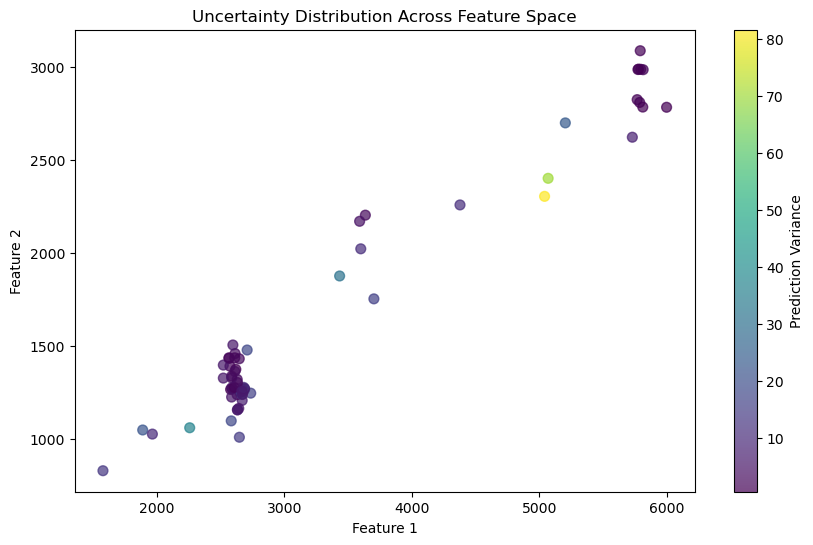

In [14]:
# Select the features you want to investigate
feature_1 = df.loc[y_test.index]['CountDNA_pos_Tot'] #X_test.iloc[:, 0]  # Assuming X1 is the first feature
feature_1 = X_test.iloc[:, 0] 
feature_2 = X_test.iloc[:, 1]  # Assuming X2 is the second feature

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(feature_1, feature_2, c=prediction_variances, cmap='viridis', s=50, alpha=0.7)
plt.colorbar(label='Prediction Variance')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Uncertainty Distribution Across Feature Space')
plt.show()

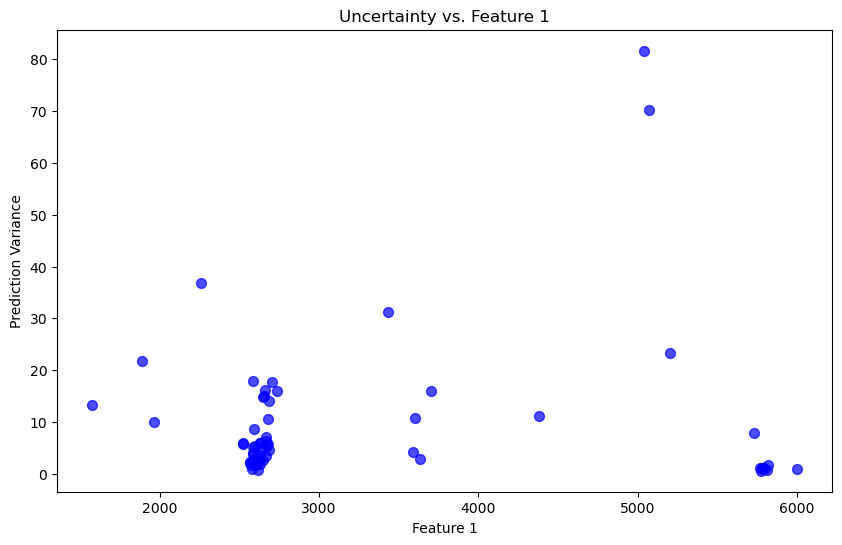

In [15]:
plt.figure(figsize=(10, 6))
plt.scatter(feature_1, prediction_variances, c='blue', s=50, alpha=0.7)
plt.xlabel('Feature 1')
plt.ylabel('Prediction Variance')
plt.title('Uncertainty vs. Feature 1')
plt.show()

In [16]:
import seaborn as sns

In [17]:
df.loc[y_test.index]['CountDNA_pos_Tot'].value_counts()

CountDNA_pos_Tot
8     38
16    10
10     5
6      2
14     2
7      1
12     1
15     1
5      1
Name: count, dtype: int64

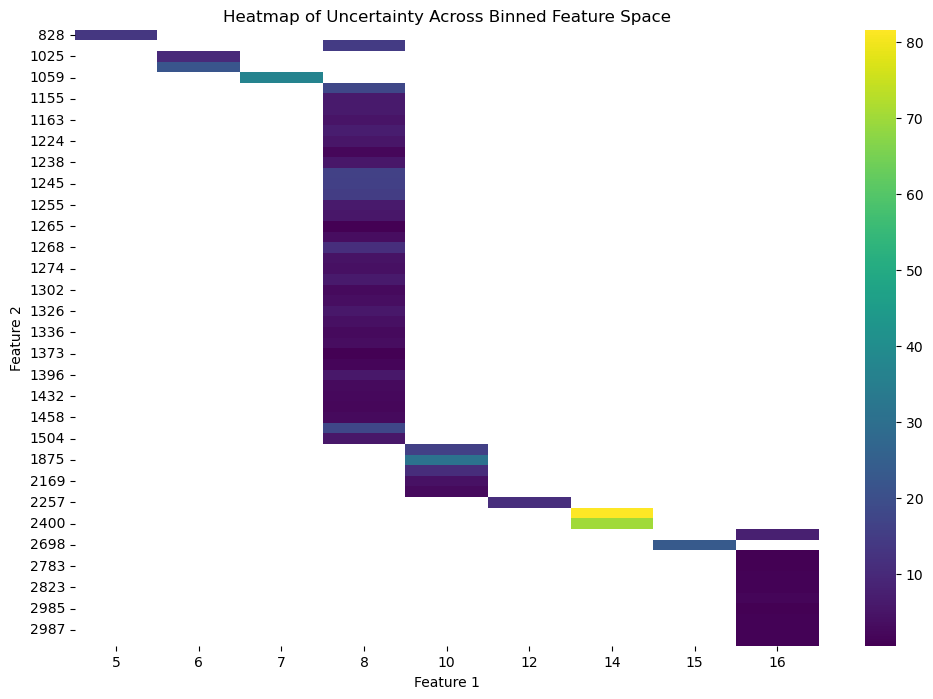

In [18]:
df_test=pd.DataFrame()
# Bin the features into intervals
df_test['Uncertainty'] = prediction_variances
df_test['Feature 1 Binned'] = df.loc[y_test.index]['CountDNA_pos_Tot'].reset_index(drop=True)
df_test['Feature 2 Binned'] = X_test.iloc[:, 1].reset_index(drop=True) #pd.cut(X_test.iloc[:, 1], bins=10)


# Calculate mean uncertainty for each bin
heatmap_data = df_test.pivot_table(values='Uncertainty', 
                              index='Feature 2 Binned', 
                              columns='Feature 1 Binned', 
                              aggfunc='mean')

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='viridis')
plt.title('Heatmap of Uncertainty Across Binned Feature Space')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

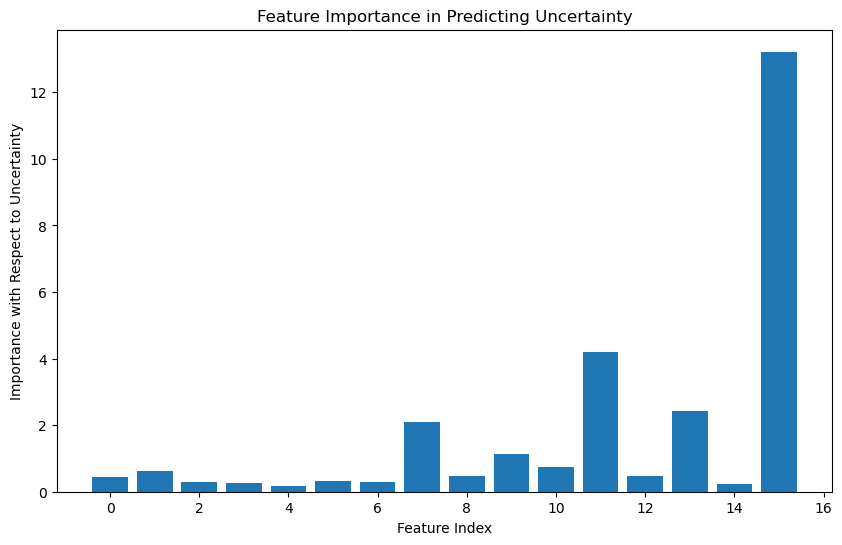

In [19]:
from sklearn.linear_model import LinearRegression

# Fit a linear model to predict uncertainty from features
model_uncertainty = LinearRegression()
model_uncertainty.fit(X_test, prediction_variances)

# Check the coefficients
coefficients = model_uncertainty.coef_
feature_importance = np.abs(coefficients)

# Plot feature importance with respect to uncertainty
plt.figure(figsize=(10, 6))
plt.bar(range(X_test.shape[1]), feature_importance)
plt.xlabel('Feature Index')
plt.ylabel('Importance with Respect to Uncertainty')
plt.title('Feature Importance in Predicting Uncertainty')
plt.show()


In [20]:
X_test.shape

(61, 16)

In [21]:
len(X_test.columns)
X_test.columns
X_test[X_test.columns[-1]]

180    12
154    25
111    25
247    11
60     19
       ..
218    25
104    23
302    25
194    12
185    12
Name: RF-Score_P----P, Length: 61, dtype: int64

/Users/ivanyankov/opt/anaconda3/envs/linear/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


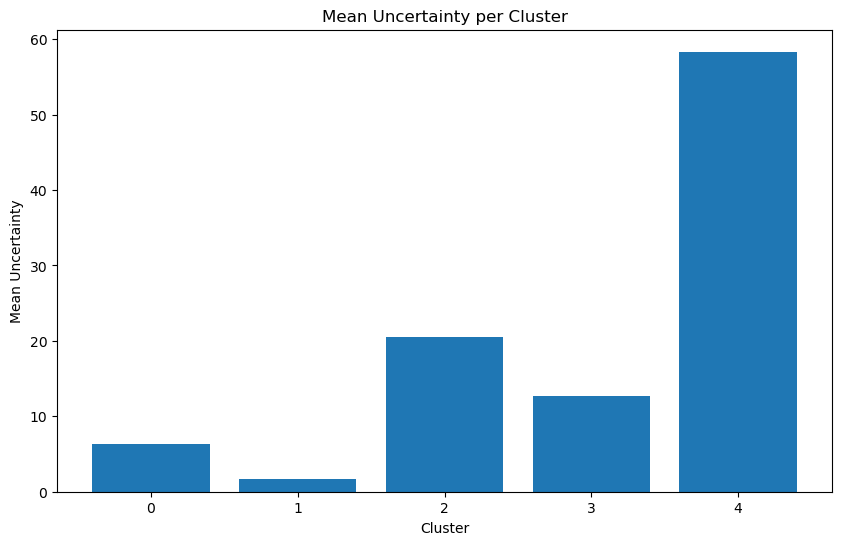

In [22]:
from sklearn.cluster import KMeans

# Cluster the data based on features
kmeans = KMeans(n_clusters=5)
clusters = kmeans.fit_predict(X_test)

# Add cluster labels to the DataFrame
df_test['Cluster'] = clusters

# Calculate mean uncertainty per cluster
cluster_uncertainty = df_test.groupby('Cluster')['Uncertainty'].mean()

# Plot cluster vs. uncertainty
plt.figure(figsize=(10, 6))
plt.bar(cluster_uncertainty.index, cluster_uncertainty.values)
plt.xlabel('Cluster')
plt.ylabel('Mean Uncertainty')
plt.title('Mean Uncertainty per Cluster')
plt.show()

In [23]:
df_test

,Uncertainty,Feature 1 Binned,Feature 2 Binned,Cluster
0,0.792085,8,1373,0
1,1.201825,16,2808,1
2,0.798347,16,2783,1
3,36.745808,7,1059,2
4,2.769387,10,2202,3
...,...,...,...,...
56,1.102182,16,2987,1
57,81.645287,14,2303,4
58,0.593318,16,2985,1
59,5.669699,8,1326,0


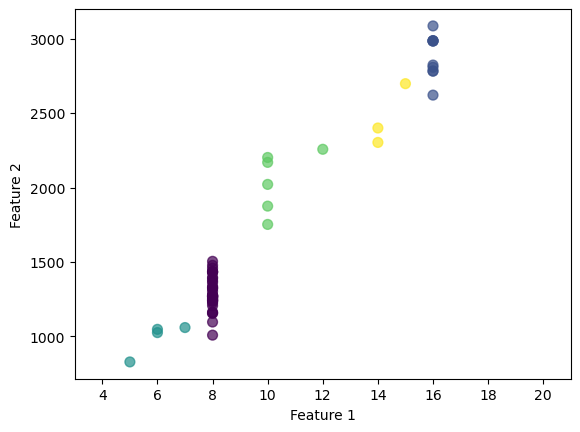

In [24]:
# Select the features you want to investigate
feature_1 = df.loc[y_test.index]['CountDNA_pos_Tot'] #X_test.iloc[:, 0]  # Assuming X1 is the first feature
# feature_1 = X_test.iloc[:, 0] 
feature_2 = X_test.iloc[:, 1]  # Assuming X2 is the second feature

# Create a scatter plot
# plt.figure(figsize=(10, 6))
# plt.scatter(feature_1, feature_2, c=df_test['Cluster'], cmap='viridis', s=50, alpha=0.7)
# plt.colorbar(label='Prediction Variance')
# plt.xlim(3, 21)
# plt.xlabel('Feature 1')
# plt.ylabel('Feature 2')
# plt.title('Uncertainty Distribution Across Feature Space')
# plt.show()
fig, ax = plt.subplots()
ax.scatter(feature_1, feature_2, c=df_test['Cluster'], cmap='viridis', s=50, alpha=0.7)
ax.set_xlim(3, 21)
# plt.colorbar(label='Prediction Variance')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

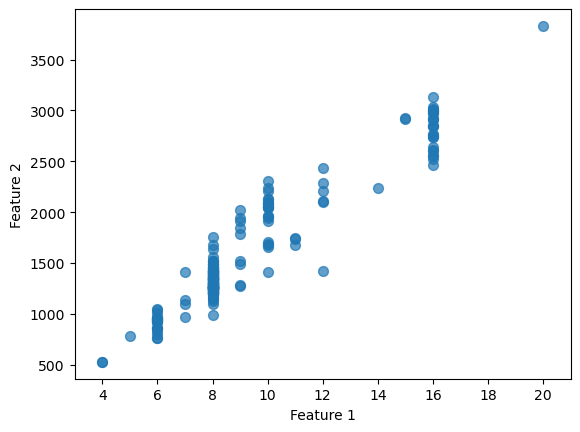

In [25]:
# Select the features you want to investigate
feature_1 = df.loc[y_train.index]['CountDNA_pos_Tot'] #X_test.iloc[:, 0]  # Assuming X1 is the first feature
# feature_1 = X_test.iloc[:, 0] 
feature_2 = X_train.iloc[:, 1]  # Assuming X2 is the second feature

# Create a scatter plot
# plt.figure(figsize=(10, 6))
# plt.scatter(feature_1, feature_2, s=50, alpha=0.7)
# plt.colorbar(label='Prediction Variance')

# plt.xlabel('Feature 1')
# plt.ylabel('Feature 2')
# plt.title('Uncertainty Distribution Across Feature Space')
# plt.show()

fig, ax = plt.subplots()
ax.scatter(feature_1, feature_2, s=50, alpha=0.7)
ax.set_xlim(3, 21)
# plt.colorbar(label='Prediction Variance')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [26]:
predictions[0]

array([39.69393939, 68.1       , 67.8       , 30.2       , 37.41081081,
       32.17916667, 54.6       , 34.9       , 39.69393939, 37.41081081,
       34.9       , 66.76666667, 39.69393939, 32.17916667, 45.79285714,
       56.        , 45.79285714, 45.79285714, 39.69393939, 34.9       ,
       39.69393939, 20.475     , 32.17916667, 39.69393939, 32.17916667,
       45.79285714, 45.79285714, 66.76666667, 37.41081081, 69.7       ,
       45.79285714, 45.79285714, 39.69393939, 39.69393939, 39.69393939,
       32.17916667, 37.41081081, 37.41081081, 68.1       , 37.41081081,
       32.17916667, 18.7       , 49.56666667, 32.17916667, 32.17916667,
       34.9       , 34.9       , 68.1       , 45.79285714, 64.9       ,
       45.79285714, 32.17916667, 37.41081081, 73.9       , 67.8       ,
       37.41081081, 66.76666667, 64.9       , 66.76666667, 53.24      ,
       45.79285714])

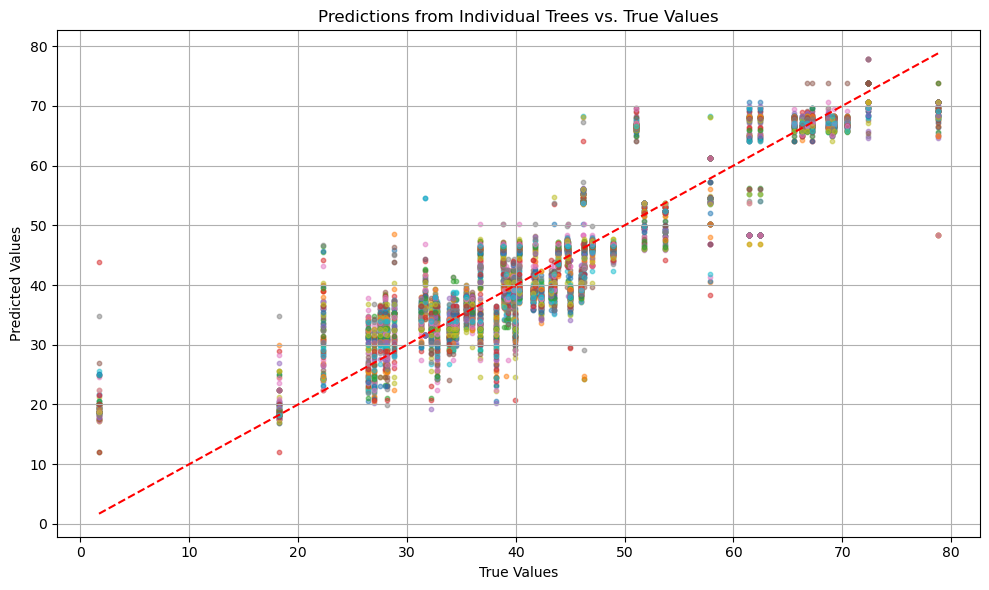

In [27]:
# true_values contains the actual target values for X_pool
true_values = y_test # y_pool  # y_pool contains the true labels for X_pool

# Plotting
plt.figure(figsize=(10, 6))

# Loop over each tree's predictions
for i, tree_predictions in enumerate(predictions):
    plt.scatter(true_values, tree_predictions, label=f'Tree {i + 1}', alpha=0.5, s=10)

# Plot a diagonal line y=x to compare predictions to the true values
plt.plot([min(true_values), max(true_values)], [min(true_values), max(true_values)], 'r--', label='y = x')

# Adding labels and title
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Predictions from Individual Trees vs. True Values')
# plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize='small', ncol=2)
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

In [28]:
prediction_variances

array([ 0.79208482,  1.20182479,  0.79834719, 36.74580803,  2.76938666,
       15.95393285, 31.15895288, 14.9328705 ,  2.63576016,  7.13872077,
        2.72454991,  1.74702295,  3.55102289,  5.65454651, 21.85054854,
       11.21559464, 17.93881221,  2.31682319,  1.92418205, 14.75678009,
        8.69938559,  9.9488231 , 16.25446283,  1.89158496, 17.78043063,
        0.88245511,  1.65365157,  0.84657041,  5.98055079, 23.23038981,
        5.21635584,  4.01666708,  3.25486779,  1.72456176,  5.44155509,
       13.9994224 , 15.96304595,  3.35266216,  1.03406267, 10.74614026,
        4.60815828, 13.34937095,  5.91266453,  5.41192984, 10.55177203,
        4.92724346,  2.59781952,  1.10672232,  3.89643476, 70.13408116,
        2.61453709,  6.24536154,  4.26118299,  7.83360562,  0.97762556,
        6.01789799,  1.10218212, 81.64528691,  0.59331848,  5.66969946,
        2.07025239])